# Group Exercise - Creating Visualizations While Exploring Data

In [2]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

with open('config.json', 'rt') as config:
    key = json.load(config)['key']

In [4]:
url = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key={key}'

In [5]:
json_code = requests.get(url).json()

In [6]:
with open('census_data_2018.json','wt') as census:
    json.dump(json_code, census)

In [7]:
census_df = pd.read_json('census_data_2018.json')

census_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1


In [8]:
census_df.rename(columns=census_df.iloc[0],inplace=True)

In [9]:
census_df.drop(0,inplace=True)

In [10]:
census_df.drop(columns=['us','SEX','GEO_ID','ETH_GROUP','VET_GROUP','FIRMPDEMP_F','RCPPDEMP_F','EMP_F','FIRMPDEMP_S_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','PAYANN_F'],inplace=True,axis=1)

In [11]:
census_df.head()

,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S
1,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,001,All firms,2018,84496,91103725,722654,21975675,3.0,8.9,7.7,7.0
2,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,611,Firms with no employees,2018,10036,3233978,0,499996,4.7,19.2,0.0,13.5
3,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,612,Firms with 1 to 4 employees,2018,47105,15792524,92631,2808773,4.7,8.2,4.8,7.4
4,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,620,Firms with 5 to 9 employees,2018,12523,10688294,83449,2601817,5.9,4.3,5.6,6.3
5,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,630,Firms with 10 to 19 employees,2018,8516,14105603,116479,3506384,6.0,16.2,6.7,10.7


In [12]:
race_groups_only = census_df[census_df['RACE_GROUP_LABEL']!='Total']

In [13]:
race_groups_only.RACE_GROUP_LABEL.unique()

array(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Minority',
       'Equally minority/nonminority', 'Nonminority', 'Classifiable',
       'Unclassifiable'], dtype=object)

In [14]:
race_emps = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','EMP']]

In [15]:
race_emps['EMP'] = race_emps['EMP'].astype(int)

C:\Users\dfbod\AppData\Local\Temp/ipykernel_23476/247016209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_emps['EMP'] = race_emps['EMP'].astype(int)


In [16]:
race_emps['RACE_GROUP_LABEL'].unique()

array(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Minority',
       'Equally minority/nonminority', 'Nonminority', 'Classifiable',
       'Unclassifiable'], dtype=object)

In [17]:
race_emps = race_emps[(race_emps['RACE_GROUP_LABEL'] != 'Classifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Nonminority') & (race_emps['RACE_GROUP_LABEL'] != 'Minority') & (race_emps['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

In [18]:
avg_num_employees = race_emps.groupby(by='RACE_GROUP_LABEL').mean()
print(avg_num_employees)

                                                      EMP
RACE_GROUP_LABEL                                         
American Indian and Alaska Native             2537.449407
Asian                                        60894.528345
Black or African American                    14131.398597
Native Hawaiian and Other Pacific Islander     522.089479
White                                       484207.282820


Text(0.5, 1.0, 'Average Number of Employees by Race')

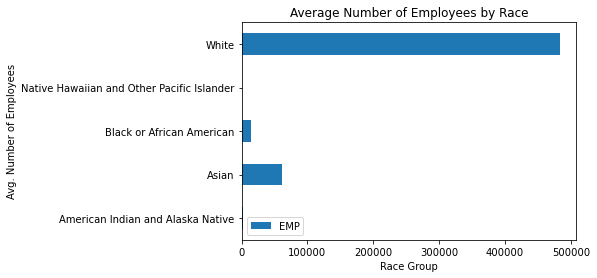

In [19]:
avg_num_employees.plot.barh()
plt.xlabel('Race Group')
plt.ylabel('Avg. Number of Employees')
plt.title('Average Number of Employees by Race')

In [20]:
census_df.columns

Index(['NAME', 'NAICS2017', 'NAICS2017_LABEL', 'SEX_LABEL', 'ETH_GROUP_LABEL',
       'RACE_GROUP', 'RACE_GROUP_LABEL', 'VET_GROUP_LABEL', 'EMPSZFI',
       'EMPSZFI_LABEL', 'YEAR', 'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN',
       'FIRMPDEMP_S', 'RCPPDEMP_S', 'EMP_S', 'PAYANN_S'],
      dtype='object')

## Race vs. Annual payments

C:\Users\dfbod\AppData\Local\Temp/ipykernel_23476/3696662211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_payann['PAYANN'] = pd.to_numeric(race_payann['PAYANN'])


                                                  PAYANN
RACE_GROUP_LABEL                                        
American Indian and Alaska Native           1.048229e+05
Asian                                       2.112672e+06
Black or African American                   4.417288e+05
Native Hawaiian and Other Pacific Islander  2.178602e+04
White                                       2.193165e+07


Text(0.5, 1.0, 'Average Pay Rate ($) in a year by Race')

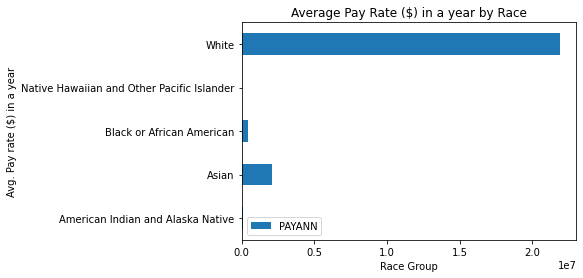

In [22]:
race_payann = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','PAYANN']]

race_payann['PAYANN'] = pd.to_numeric(race_payann['PAYANN'])

race_payann = race_payann[(race_payann['RACE_GROUP_LABEL'] != 'Classifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Nonminority') & (race_payann['RACE_GROUP_LABEL'] != 'Minority') & (race_payann['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_pay_by_race = race_payann.groupby('RACE_GROUP_LABEL').mean()
print(avg_pay_by_race)
avg_pay_by_race.plot.barh()
plt.xlabel('Race Group')
plt.ylabel('Avg. Pay rate ($) in a year')
plt.title('Average Pay Rate ($) in a year by Race')

May need to normalize number by dividing by total employee populations for more accurate representation of pay rates. Regardless, if the White race group has roughly an 8 times larger average population than the Asian race group, which would make these two race groups more comparable, but there would still be a siginificant discrepancy when looking at other race groups.

## Race vs. Total Sales (\$)

                                                RCPPDEMP
RACE_GROUP_LABEL                                        
American Indian and Alaska Native           2.545436e+05
Asian                                       5.361995e+06
Black or African American                   8.114463e+05
Native Hawaiian and Other Pacific Islander  7.259541e+04
White                                       5.691404e+07


C:\Users\dfbod\AppData\Local\Temp/ipykernel_23476/944698470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_sales['RCPPDEMP'] = pd.to_numeric(race_sales['RCPPDEMP'])


Text(0.5, 1.0, 'Average Total Sales ($) in a year by Race')

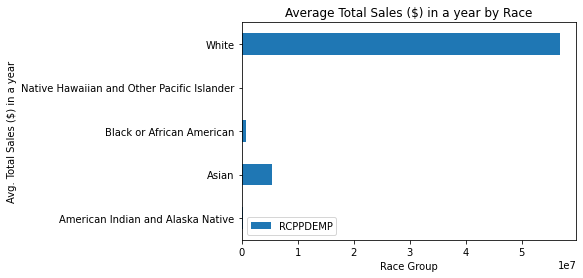

In [23]:
race_sales = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','RCPPDEMP']]

race_sales['RCPPDEMP'] = pd.to_numeric(race_sales['RCPPDEMP'])

race_sales = race_sales[(race_sales['RACE_GROUP_LABEL'] != 'Classifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Nonminority') & (race_sales['RACE_GROUP_LABEL'] != 'Minority') & (race_sales['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_total_sales_by_race = race_sales.groupby('RACE_GROUP_LABEL').mean()
print(avg_total_sales_by_race)
avg_total_sales_by_race.plot.barh()
plt.xlabel('Race Group')
plt.ylabel('Avg. Total Sales ($) in a year')
plt.title('Average Total Sales ($) in a year by Race')

Larger proportions of each groups' populations and outliers can skew the data. This aggregation would also need to be normalized for an accurate representation of this category.